# The purpose of this notebook is to make my first Neuronal Network. 

The notebook take like reference [this tutorial](https://www.youtube.com/watch?v=W8AeOXa_FqU&t=561s)

## Import modules

In [2]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import time
from IPython.display import clear_output
from sklearn.datasets import make_circles

%matplotlib inline
%pylab inline

Populating the interactive namespace from numpy and matplotlib


Create the dataset

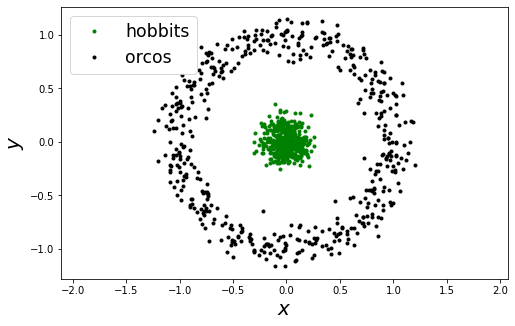

In [4]:
n = 1000
p = 2

X, Y = make_circles(n_samples = n, factor = 0, noise = 0.1)
### The variable X have the dataset information, while Y have a binary(0,1) information that refer to the different circles.
Y = Y[:,np.newaxis]
plt.figure(figsize=(8,5))
plt.plot(X[Y[:,0] ==1,0], X[Y[:,0]==1,1],'.', color = 'g', label = 'hobbits')
plt.plot(X[Y[:,0]==0,0], X[Y[:,0]==0,1],'.', color = 'k', label = 'orcos')
plt.axis('equal')
plt.xlabel('$x$', fontsize = 20)
plt.ylabel('$y$', fontsize = 20)
plt.legend(fontsize='xx-large')

In [10]:
class neural_layer():
    ### Number of connections, number of neuron, activation function.
    def __init__(self, n_conn, n_neur, act_fun):
        self.act_fun = act_fun
        ### Inicializar parametros de la capa (bias, weight)
        self.b = np.random.rand(1,n_neur)*2 - 1 # num. aleatorios entre -1 y 1
        self.w = np.random.rand(n_conn, n_neur)*2 - 1

### One needs the activation functions

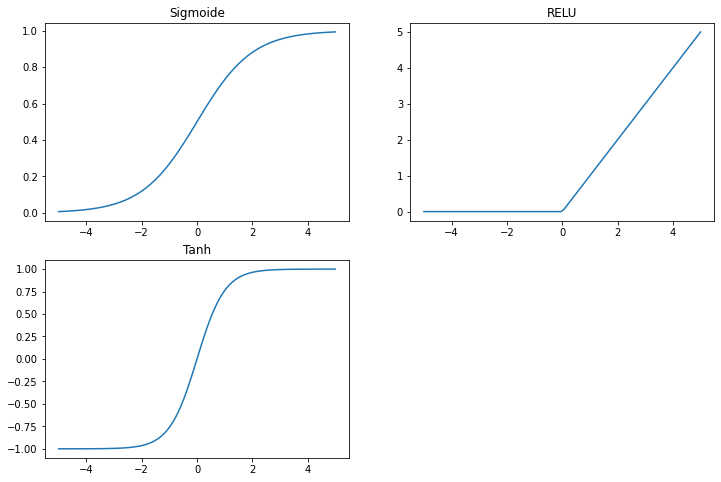

In [11]:
### Sigmoide
sigm = (lambda x: 1 / (1 + np.exp(-x)), lambda x: x*(1-x)) # funcion de activacion y su derivada.
### relu
relu = lambda x: np.maximum(0,x)
### hyperbolic tangent
tanh = lambda x: np.tanh(x)
### Plotting
xx = np.linspace(-5,5,100)
plt.figure(figsize=(12,8))
plt.subplot(2,2,1)
plt.title('Sigmoide')
plt.plot(xx,sigm[0](xx))
plt.subplot(2,2,2)
plt.title('RELU')
plt.plot(xx,relu(xx))
plt.subplot(2,2,3)
plt.title('Tanh')
plt.plot(xx,tanh(xx))

design the network

In [12]:
def create_nn(topology, act_f):
    nn = [] ### vector que contiene la informacion de las capas
    for l, layer in enumerate(topology[:-1]):
        nn.append(neural_layer(topology[l],topology[l+1], act_f))
    return nn

In [34]:
topology = (p,4,8,1)
neural_net = create_nn(topology,sigm)

In [14]:
neural_net

With that one has the network build, but not learning. One needs the backpropagation algorithm.

In [26]:
### Funcion de coste (valor predicho, valor real). Se necesita el coste y su derivada
fcost = (lambda Yp, Yr: np.mean((Yp - Yr)**2), lambda Yp, Yr: (Yp - Yr))

def train(neural_net, X, Y, fcost, lr = 0.1, train = True):
    out = [(None, X)]  # se guardara la suma ponderada y la activacion
    ### Forward pass
    for l, layer in enumerate(neural_net):
        z = out[-1][1] @ neural_net[l].w + neural_net[l].b # suma ponderada
        a = neural_net[l].act_fun[0](z)                    # activacion
        out.append((z,a))
    print(fcost[0](out[-1][1],Y)) # solo para ver una prediccion, pero no el entrenemiento.
    if train:
        # Backward pass
        delta = []
        for l in reversed(range(0,len(neural_net))):
            z = out[l+1][0]
            a = out[l+1][1]
            if l==len(neural_net) - 1: # -1 porque los indices empiezan en 0, lo que significa que estamos en la ultima capa
                #calcular delta de la ultima capa
                delta.insert(0,fcost[1](a,Y) * neural_net[l].act_fun[1](a))
            
            else:
                #calcular delta respecto a capa previa
                delta.insert(0, delta[0] @ ww.T * neural_net[l].act_fun[1](a))
            ww = neural_net[l].w
            # Gradient descent
            neural_net[l].b = neural_net[l].b - np.mean(delta[0],axis=0,keepdims=True) * lr
            neural_net[l].w = neural_net[l].w - out[l][1].T @ delta[0] * lr
    return out[-1][1]
        
        
#train(neural_net, X, Y, fcost, 0.5)

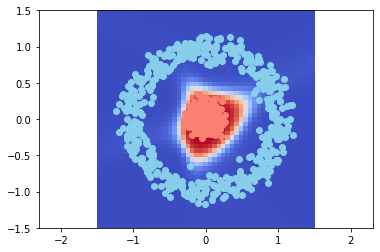

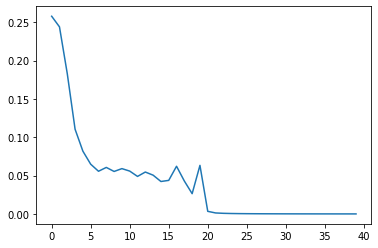

0.00010479761063055809
0.00010456328074535187
0.0001043299509984539
0.00010409761514374161
0.00010386626698634368
0.00010363590038212347
0.00010340650923716384
0.00010317808750726116
0.00010295062919742415
0.00010272412836137963
0.00010249857910108235
0.00010227397556623332
0.0001020503119538014
0.00010182758250755205
0.00010160578151758098
0.00010138490331985356
0.00010116494229574971
0.00010094589287161451
0.0001007277495183116
0.0001005105067507869
0.00010029415912763206
0.00010007870125065665
9.986412776446264e-05
9.965043335602692e-05


In [35]:
neural_n = create_nn(topology, sigm)

loss = []  # guardar los diferentes costes y ver como cambia con el tiempo

for i in range(1000):
    # Entrenemos la red
    pY = train(neural_n, X, Y, fcost)
    if i % 25 ==0:
        loss.append(fcost[0](pY,Y))
        
        res = 50 
        
        x0 = np.linspace(-1.5,1.5,res)
        x1 = np.linspace(-1.5,1.5,res)
        
        yy = np.zeros((res,res))
        
        for j, k in enumerate(x0):
            for jj, kk in enumerate(x1):
                yy[j,jj] = train(neural_n, np.array([[k,kk]]), Y, fcost, train=False)[0][0]
        plt.pcolormesh(x0,x1,yy,cmap='coolwarm')
        plt.axis('equal')
        
        plt.scatter(X[Y[:,0]==0,0], X[Y[:,0]==0,1], c='skyblue')
        plt.scatter(X[Y[:,0]==1,0], X[Y[:,0]==1,1], c='salmon')
        
        clear_output(wait=True)
        plt.show()
        plt.plot(range(len(loss)),loss)
        plt.show()
        time.sleep(0.5)